In [132]:
%pip install cv
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



In [133]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [134]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

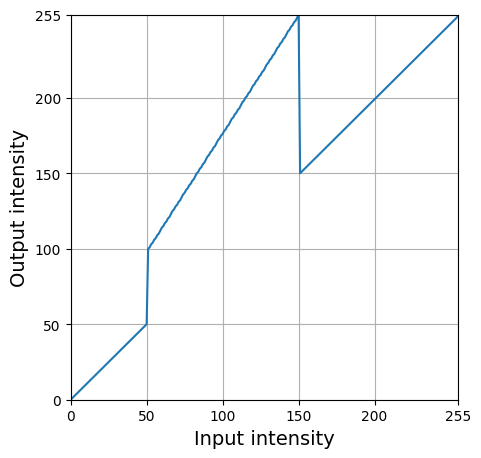

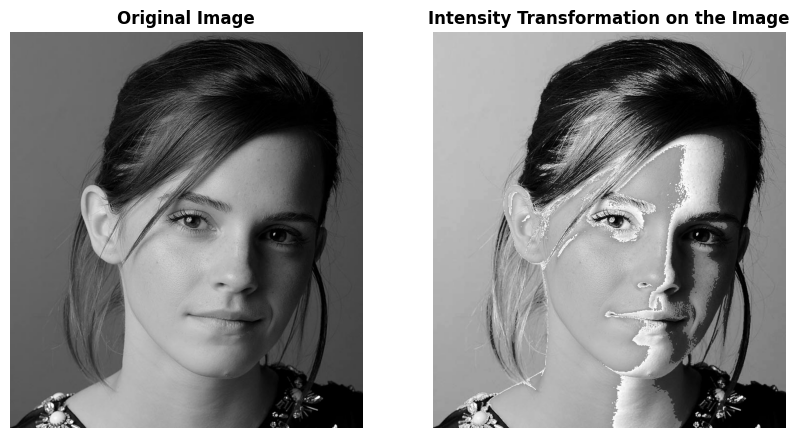

In [135]:
im = cv.imread("emma.jpg",cv.IMREAD_GRAYSCALE)


t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
label = [0, 50, 100,150, 200,255]
transformation = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

assert len(transformation) == 256
transformed = cv.LUT(im,transformation)

plt.figure(figsize = (5,5))
plt.plot(transformation)
plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.xlabel('Input intensity', fontsize = 14)
plt.ylabel('Output intensity', fontsize = 14)




fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 12)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(transformed,cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformation on the Image',fontweight ="bold",fontsize = 12)
ax[1].axis('off')

plt.show()


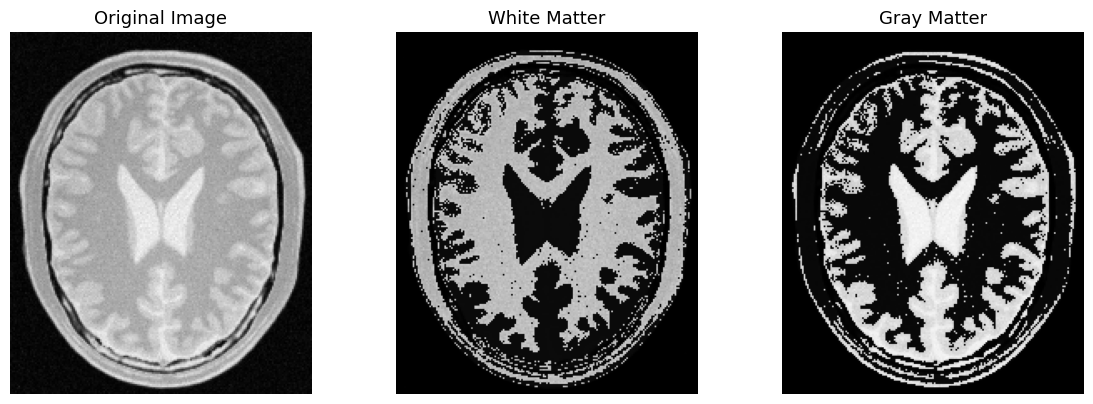

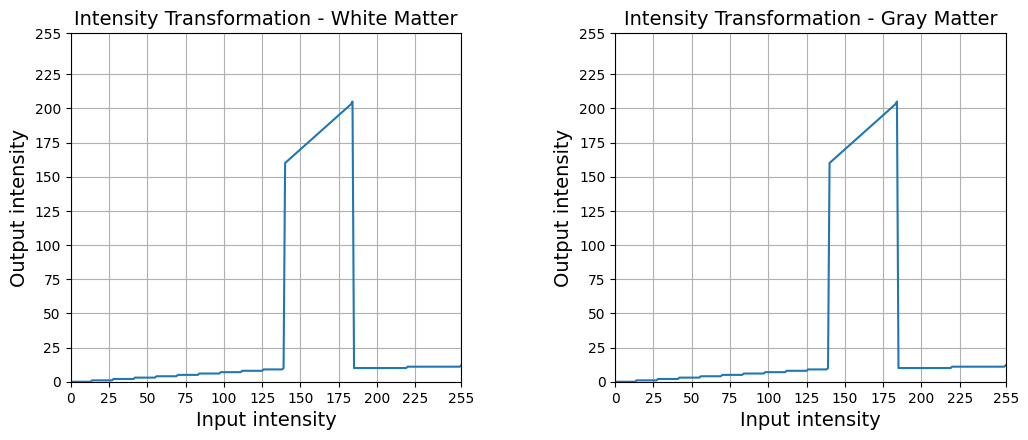

In [136]:
im = cv.imread("E:\Semester 5\Image processing Assignment 1\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 10, 140)
t2 = np.linspace(160, 205, 45)
t3 = np.linspace(10, 12, 71)

z1 = np.linspace(0, 10, 185)
z2 = np.linspace(205,235, 35)
z3 = np.linspace(235, 255, 36)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

transformation1 = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
transformation2 = np.concatenate((z1, z2, z3), axis = 0).astype(np.uint8)

assert len(transformation1) == 256
assert len(transformation2) == 256
transformed1 = cv.LUT(im,transformation1)
transformed2= cv.LUT(im,transformation2)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', transformed1)
cv.waitKey(0)
cv.imshow('Image', transformed2)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =3.0)

ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 13)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(transformed1,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 13)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(transformed2,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 13)
ax[2].axis('off')

fig, ax = plt.subplots(1,2,figsize = (12,6 ))
fig.tight_layout(pad =8.0)

ax[0].plot(transformation1)
ax[0].set_title('Intensity Transformation - White Matter', fontsize = 14)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity', fontsize = 14)
ax[0].set_ylabel('Output intensity', fontsize = 14)

ax[1].plot(transformation1)
ax[1].set_title('Intensity Transformation - Gray Matter', fontsize = 14)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity', fontsize = 14)
ax[1].set_ylabel('Output intensity', fontsize = 14)


plt.show()

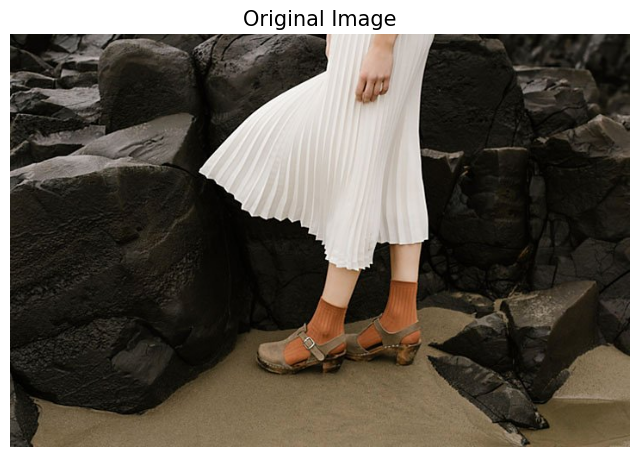

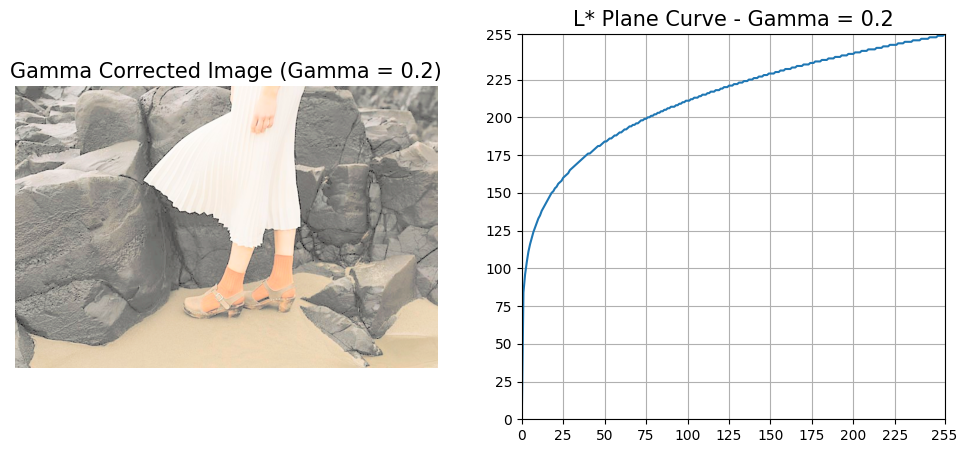

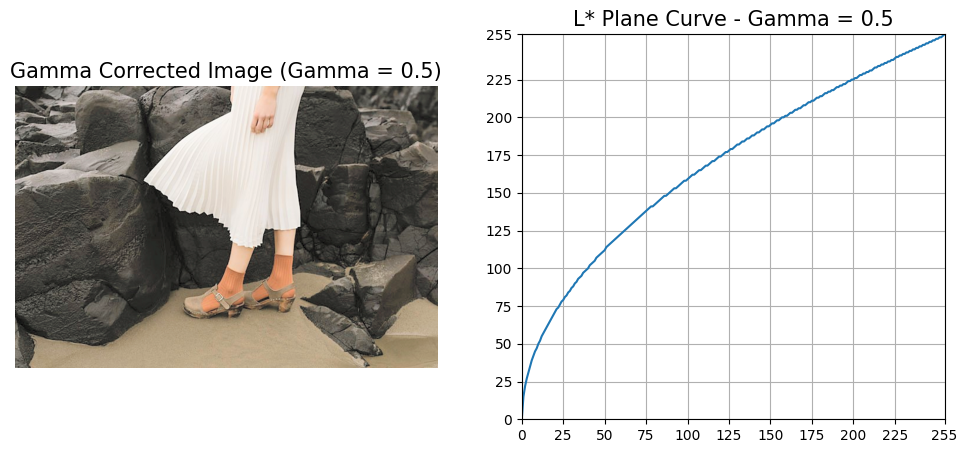

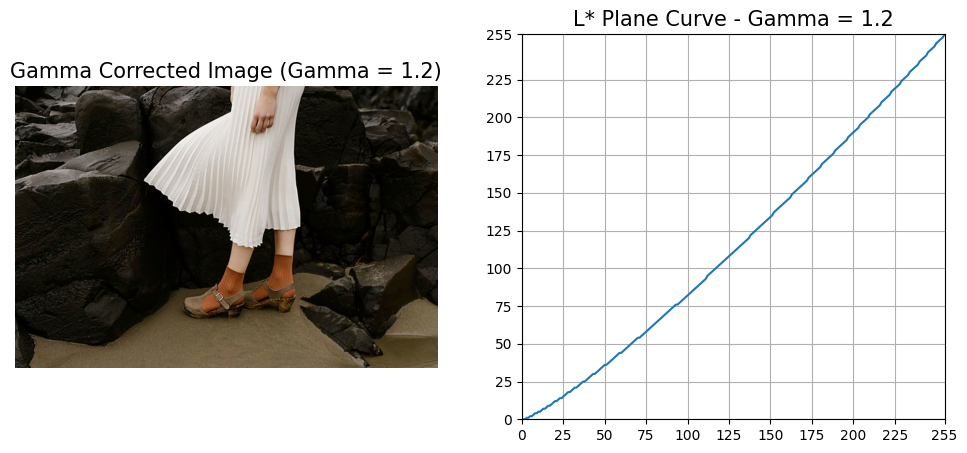

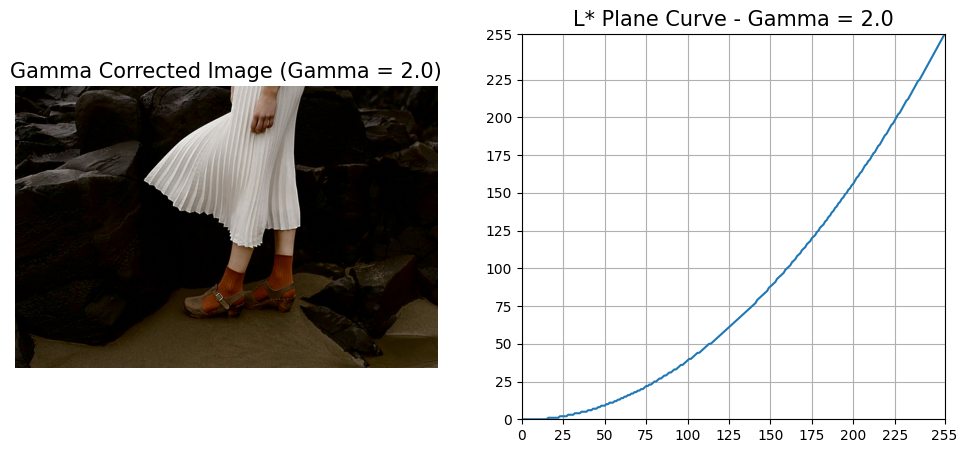

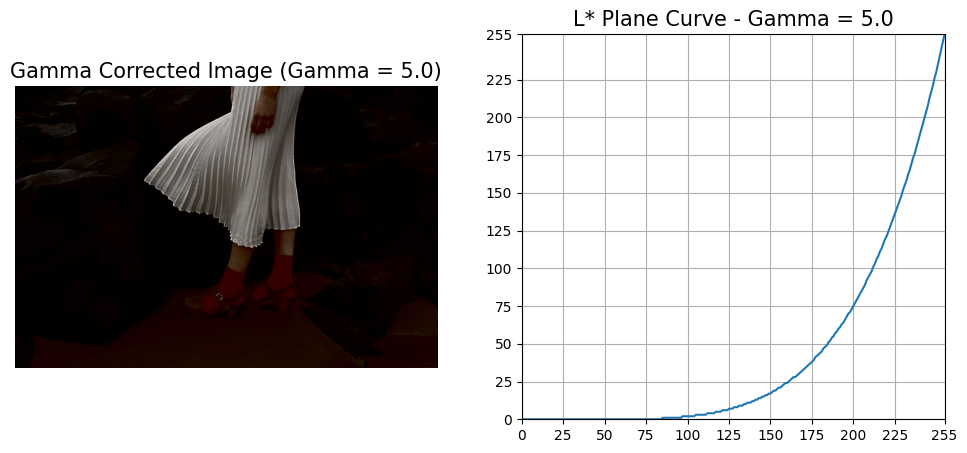

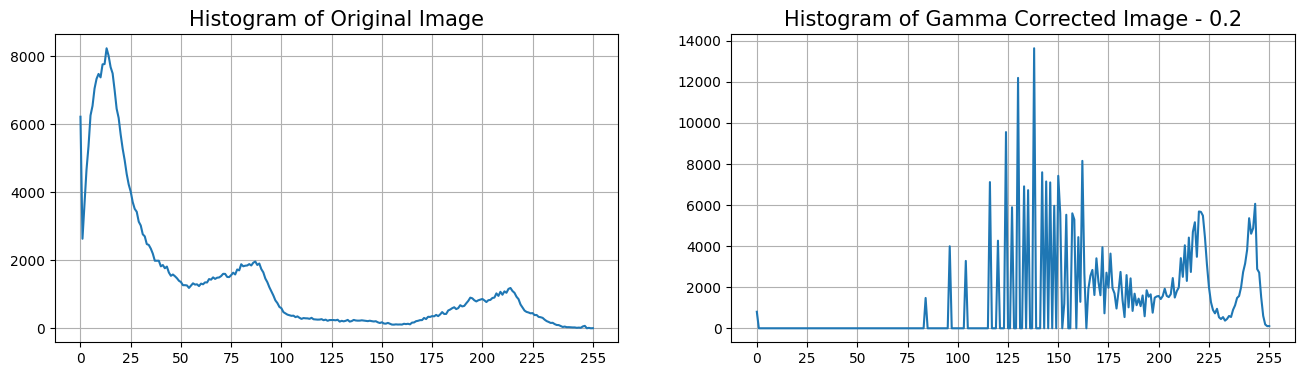

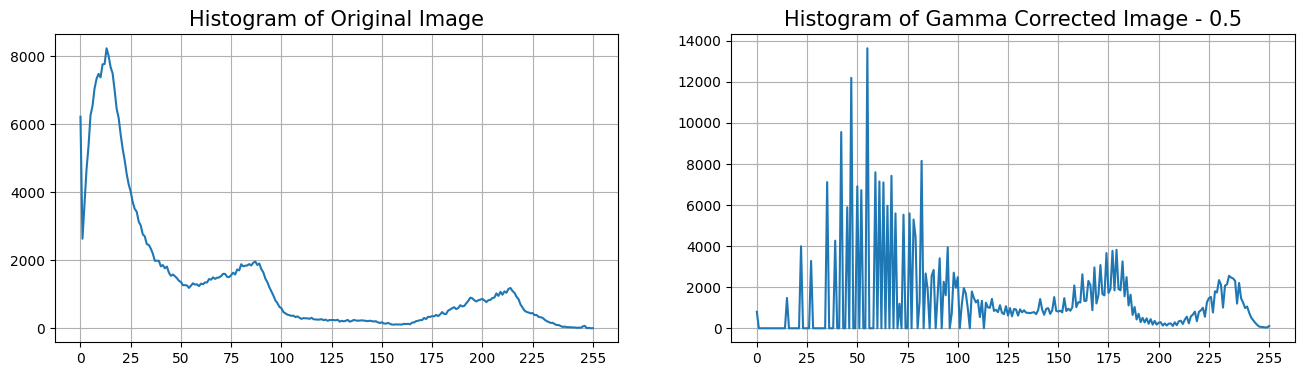

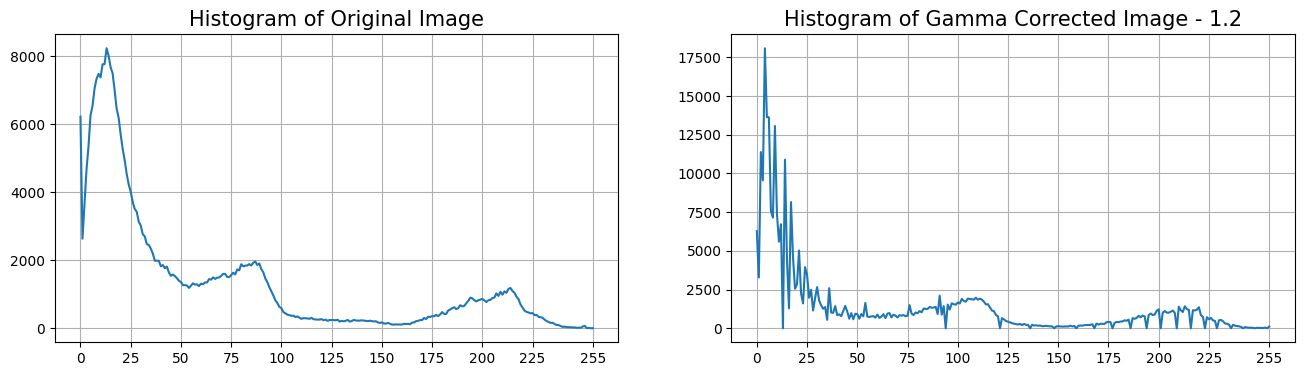

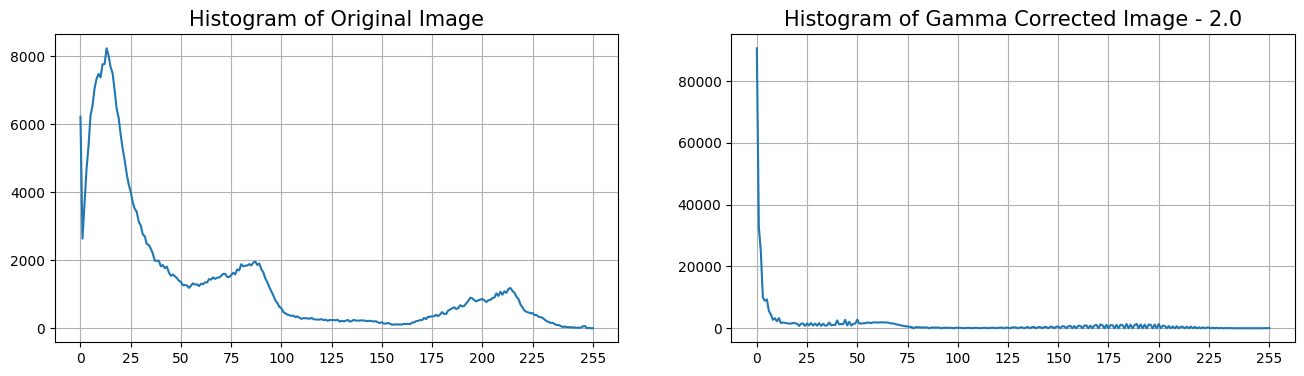

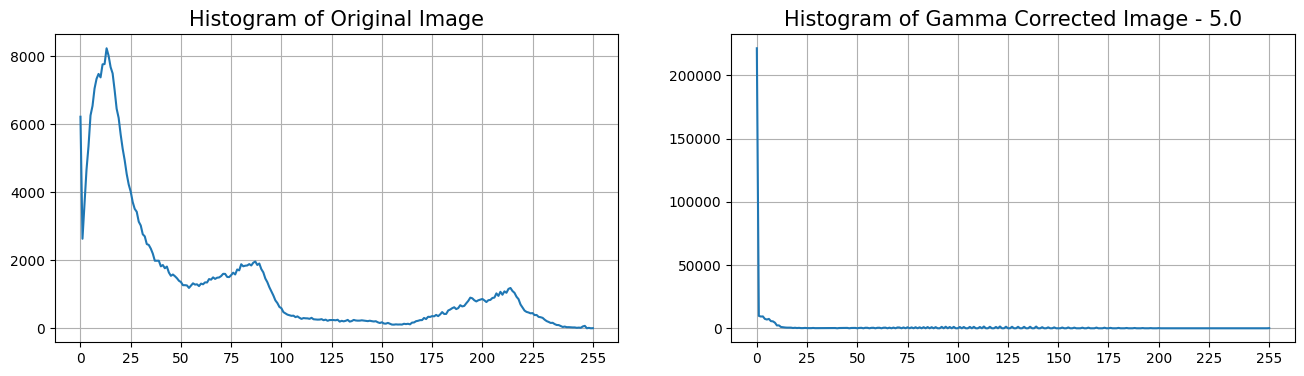

In [137]:

import math

im = cv.imread("E:\Semester 5\Image processing Assignment 1\highlights_and_shadows.jpg")
assert im is not None

lab = cv.cvtColor(im, cv.COLOR_BGR2LAB)
cv.imshow('Image', im)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imshow('Image', lab)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.axis('off')

L, A, B = cv.split(lab)
##mid = 0.5
##mean = np.mean(L)
##gamma = math.log(mid*255)/math.log(mean)

gamma = [0.2, 0.5, 1.2, 2.0, 5.0]
hist_g = []

for j in gamma:
    
    lookUpTable = np.array([(p/255)**(j)*255 for p in range(0, 256)]).astype(np.uint8)

    L_G = cv.LUT(L, lookUpTable)

    lab_gamma = cv.merge([L_G, A, B])
    hist_g.append(cv.calcHist([lab_gamma], [0], None, [256], [0,256]))

    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
            
    cv.imshow('Image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    ax[0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(j)+")")
    ax[0].axis('off')

    ax[1].plot(lookUpTable.ravel())
    ax[1].set_title("L* Plane Curve - Gamma = " + str(j))
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    ax[1].grid("on")

 
    
    plt.show()


for k in range(len(hist_g)):
    hist_f = cv.calcHist([im], [0], None, [256], [0,256])

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(hist_f)
    ax[0].set_title("Histogram of Original Image")
    ##ax[0].set_xlim([0, 256])
    ##ax[0].set_ylim([0, 10000])
    ax[0].set_xticks(label)
    ax[0].grid('on')

    ax[1].plot(hist_g[k])
    ax[1].set_title("Histogram of Gamma Corrected Image - " + str(gamma[k]))
    ##ax[1].set_xlim([0,256])
    ##ax[1].set_ylim([0, 40000])
    ax[1].set_xticks(label)
    ax[1].grid('on')

    plt.show()

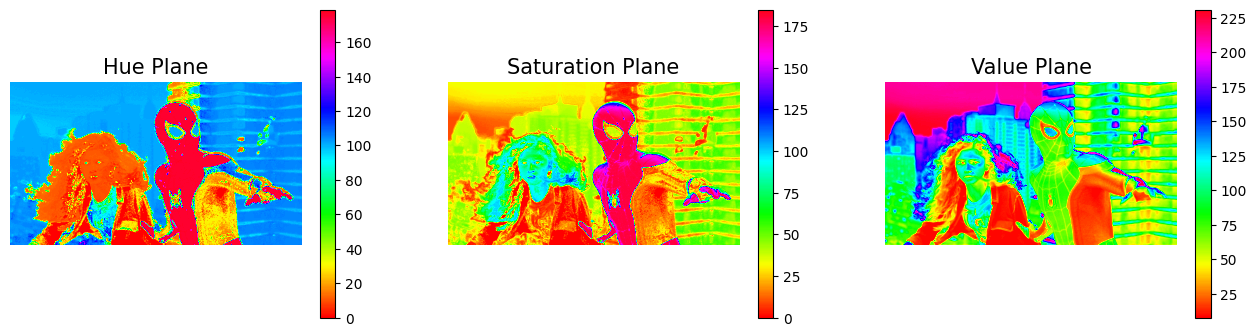

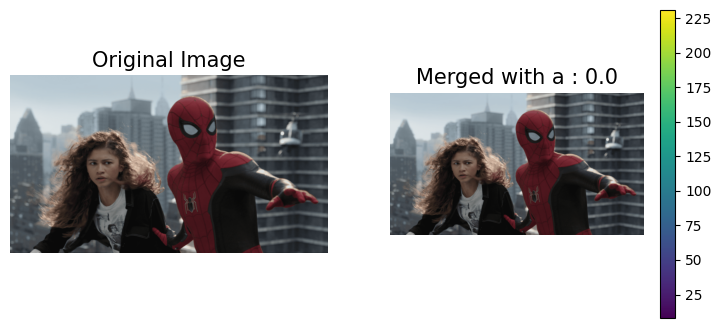

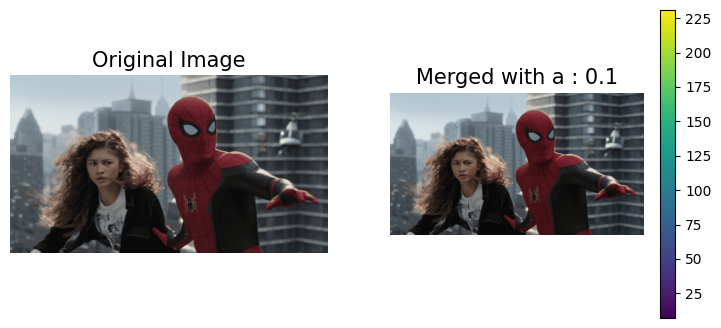

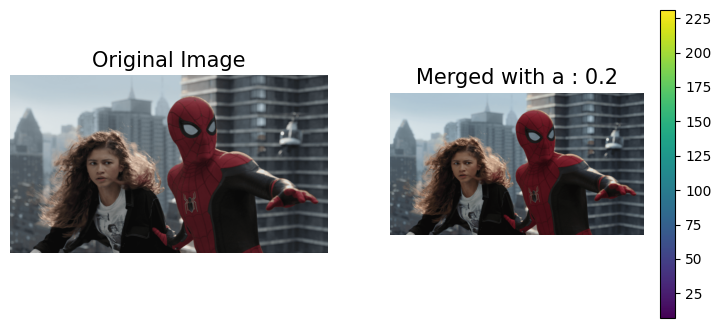

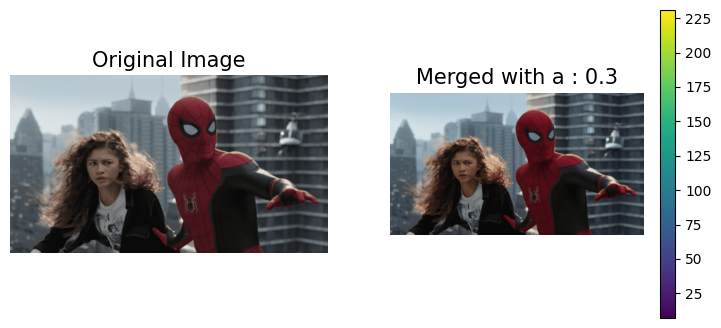

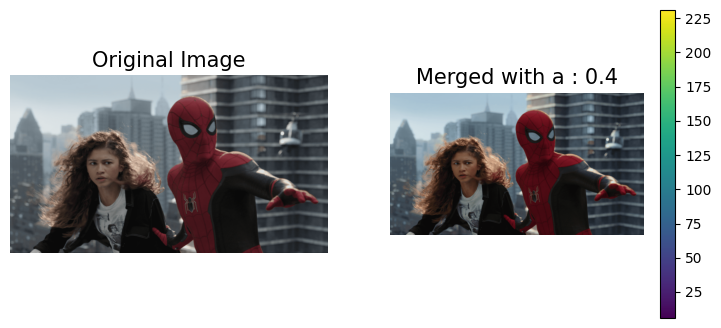

Text(0, 0.5, 'Output intensity')

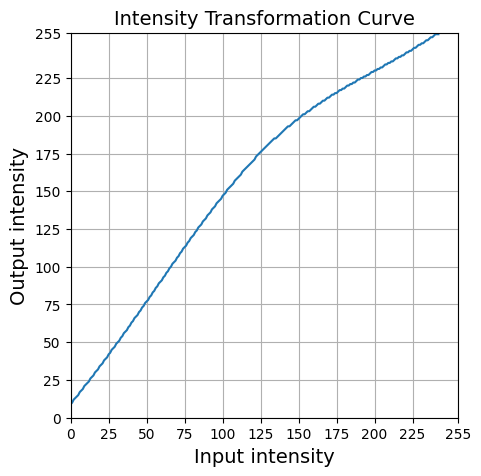

In [138]:
im4=cv.imread("E:\Semester 5\Image processing Assignment 1\spider.png")
hsv_image=cv.cvtColor(im4,cv.COLOR_BGR2HSV)
hue,saturation,value=cv.split(hsv_image)

plt.figure(figsize=(16, 4))

# Hue Plane
plt.subplot(131)
plt.imshow(hue, cmap='hsv')
plt.title('Hue Plane')
plt.colorbar()
plt.axis('off')

# Saturation Plane
plt.subplot(132)
plt.imshow(saturation, cmap='hsv')
plt.title('Saturation Plane')
plt.colorbar()
plt.axis('off')

# Value Plane
plt.subplot(133)
plt.imshow(value, cmap='hsv')
plt.title('Value Plane')
plt.colorbar()
plt.axis('off')

#plt.tight_layout()
plt.show()


a = 0.5 # You can adjust this value based on (c)
for b in range(5):
    a=b/10

    sigma = 70.0
    mean = 128.0

    intensity_transformation = np.vectorize(lambda x: min(254, (x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2))).astype('uint8')))
    new_saturation = intensity_transformation(saturation)
    enhanced_hsv_image = cv.merge([hue, new_saturation, value])
    
    plt.figure(figsize=(9, 4))
    plt.subplot(121)
    original=cv.cvtColor(im4,cv.COLOR_BGR2RGB)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    #print(hue.shape(),new_saturation.shape(),value.shape())
    enhanced_hsv_image = cv.merge([hue, new_saturation, value])
    final=cv.cvtColor(enhanced_hsv_image,cv.COLOR_HSV2RGB)
    plt.subplot(122)
    plt.imshow(final)
    plt.title('Merged with a : '+str(a))
    plt.colorbar()
    plt.axis('off')

    plt.show()
plt.figure(figsize = (5,5))
plt.plot(intensity_transformation(np.arange(0, 243)))

plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.title('Intensity Transformation Curve', fontsize = 14)
plt.xlabel('Input intensity', fontsize = 14)
plt.ylabel('Output intensity', fontsize = 14)


Text(0, 0.5, 'Output intensity')

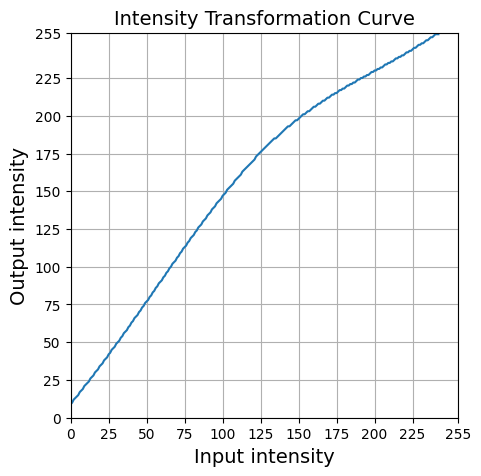

In [139]:
plt.figure(figsize = (5,5))
plt.plot(intensity_transformation(np.arange(0, 243)))

plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.title('Intensity Transformation Curve', fontsize = 14)
plt.xlabel('Input intensity', fontsize = 14)
plt.ylabel('Output intensity', fontsize = 14)

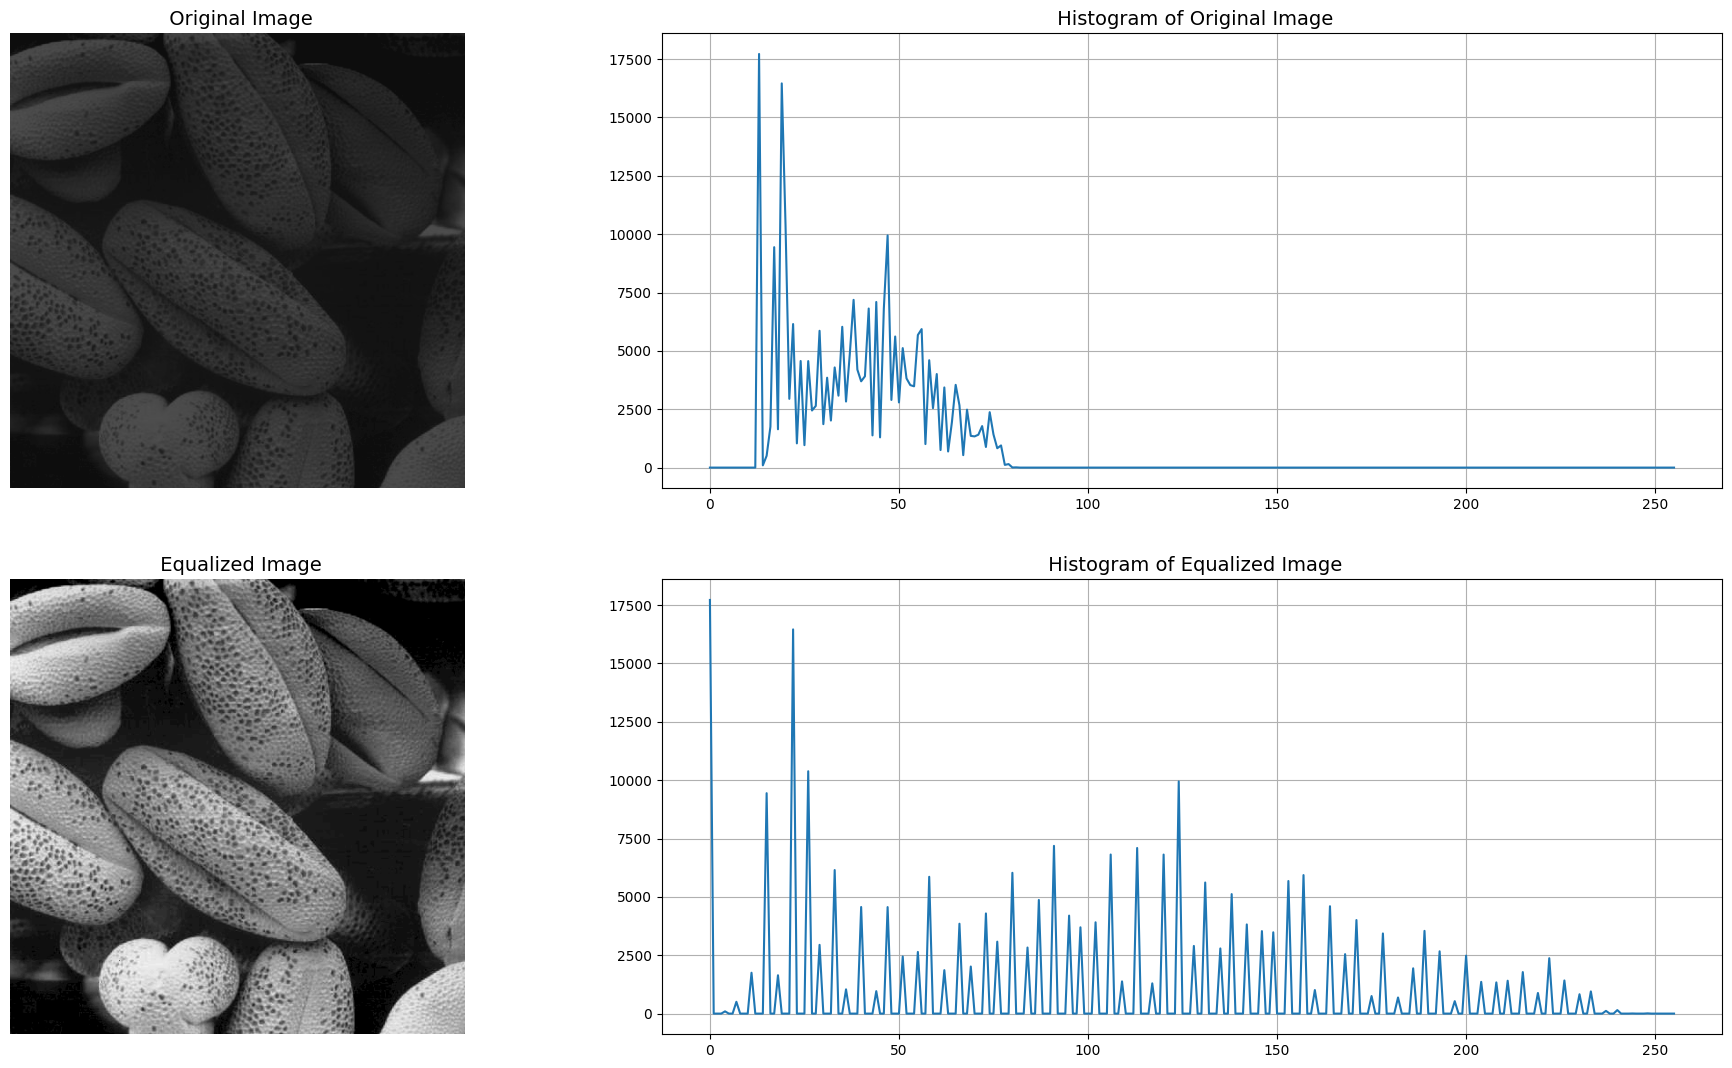

In [140]:
im = cv.imread("E:\Semester 5\Image processing Assignment 1\shells.tif", cv.IMREAD_GRAYSCALE)
assert im is not None
ims = im.copy()

high = 0
low = 0

hist = np.zeros(256)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for k in range(256):
            if im[i,j] == k:
                hist[k] += 1
                break
                
for i in range(0, 256, 1):
        if (hist[i] != 0):
            low = i
            break
    
for i in range(255, -1, -1):
    if (hist[i] != 0):
        high = i
        break

for i in range(ims.shape[0]):
    for j in range(ims.shape[1]):
        for k in range(high):
            if ims[i,j] == k:
                ims[i,j] = round((k-low)*((255-0)/(high-low)) + 0)
                break

hist_eq = np.zeros(256)
for i in range(ims.shape[0]):
    for j in range(ims.shape[1]):
        for k in range(256):
            if ims[i,j] == k:
                hist_eq[k] += 1
                break

cv.imshow('Image', ims)
cv.waitKey(0)
cv.destroyAllWindows()
    
fig, ax = plt.subplots(2, 2, figsize=(26, 13))
plt.subplots_adjust(wspace = -0.1, hspace = None)

ax[0,0].imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax[0,0].set_title(" Original Image", fontsize = 14)
ax[0,0].axis("off")

ax[0,1].plot(hist)
ax[0,1].set_title(" Histogram of Original Image", fontsize = 14)
ax[0,1].grid('on')

ax[1,0].imshow(cv.cvtColor(ims ,cv.COLOR_BGR2RGB))
ax[1,0].set_title(" Equalized Image", fontsize = 14)
ax[1,0].axis("off")

ax[1,1].plot(hist_eq )
ax[1,1].set_title(" Histogram of Equalized Image", fontsize = 14)
ax[1,1].grid('on')

plt.show()

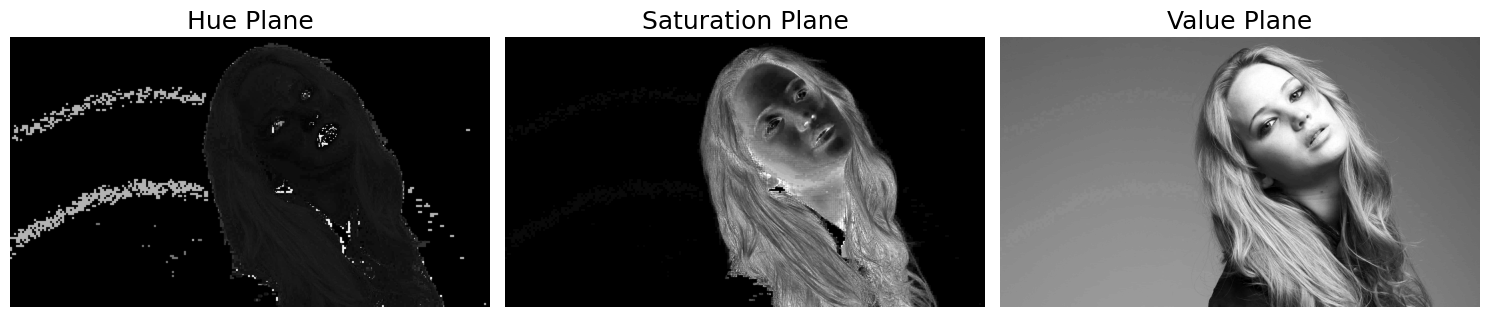

In [141]:
img6 = cv.imread( "jeniffer.jpg", cv.IMREAD_COLOR)
hue_plane,saturation_plane,value_plane=cv.split(img6_hsv)

plt.figure(figsize = (15, 10))
plt.rc("axes", titlesize = 18)
plt.subplot(131)
plt.imshow(img6_hsv[:, :, 0], cmap = 'gray')
plt.title("Hue Plane")
plt.axis('off')
plt.subplot(132)
plt.imshow(img6_hsv[:, :, 1], cmap = 'gray')
plt.title("Saturation Plane")
plt.axis('off')
plt.subplot(133)
plt.imshow(img6_hsv[:, :, 2], cmap = 'gray')
plt.title("Value Plane")
plt.axis('off')
plt.tight_layout()

# Saturation plane can be used to extract the foreground
threshold = 11  # This was adjusted until the separation was satisfactory
mask = (saturation_plane > threshold).astype(np.uint8) * 255 
mask_3d = np.repeat(mask[:, :, None], 3, axis=2)

foreground_hsv = np.bitwise_and(img6_hsv, mask_3d)  # obtaining the foreground
foreground_rgb = cv.cvtColor(foreground_hsv, cv.COLOR_HSV2RGB)

plt.figure(figsize = (15, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(132)
plt.imshow(mask_3d)
plt.title('Mask')
plt.axis('off')
plt.subplot(133)
plt.imshow(foreground_rgb)
plt.title('Foreground')
plt.axis('off')
plt.tight_layout()


fig, ax = plt.subplots(1, 2, figsize = (15, 5))
plt.rc("axes", titlesize = 15)


gayscale_img=cv.cvtColor(foreground_rgb,cv.COLOR_BGR2GRAY)
equalized_foreground = foreground_rgb.copy()
#hist = cv.calcHist([gayscale_img], [0], None, [256], [0, 256])




colors = ('r', 'g', 'b')
total = mask.sum() // 255

# Loop over color channels and calculate and plot histograms
for i, color in enumerate(colors):
    # Consider only foreground by giving mask as an argument
    hist = cv.calcHist([foreground_rgb], [i], mask, [256], [0, 256])
    ax[0].plot(hist)
    ax[0].set_xlim([0, 256])

    cumulative = np.cumsum(hist)
    ax[1].plot(cumulative)
    ax[1].set_xlim([0, 256])

    transform = cumulative * 255 / cumulative[-1]
    equalized_foreground[:, :, i] = transform[foreground_rgb[:, :, i]]

# Remove background again after equalization
equalized_foreground = np.bitwise_and(equalized_foreground, mask_3d)

ax[0].set_title("Histogram of foreground")
ax[1].set_title("Cumulative sum of histogram of foreground")

background_mask_3d = 255 - mask_3d # Invert the mask to get the background
background_hsv = np.bitwise_and(img6_hsv, background_mask_3d)   
background_rgb = cv.cvtColor(background_hsv, cv.COLOR_HSV2RGB)
final_image = background_rgb + equalized_foreground        # Add the equalized foreground and original background



plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(equalized_foreground)
plt.title('Equalized Foreground')
plt.axis('off')
plt.subplot(122)
plt.imshow(final_image)
plt.title('Final result with original background')
plt.axis('off')
plt.tight_layout()

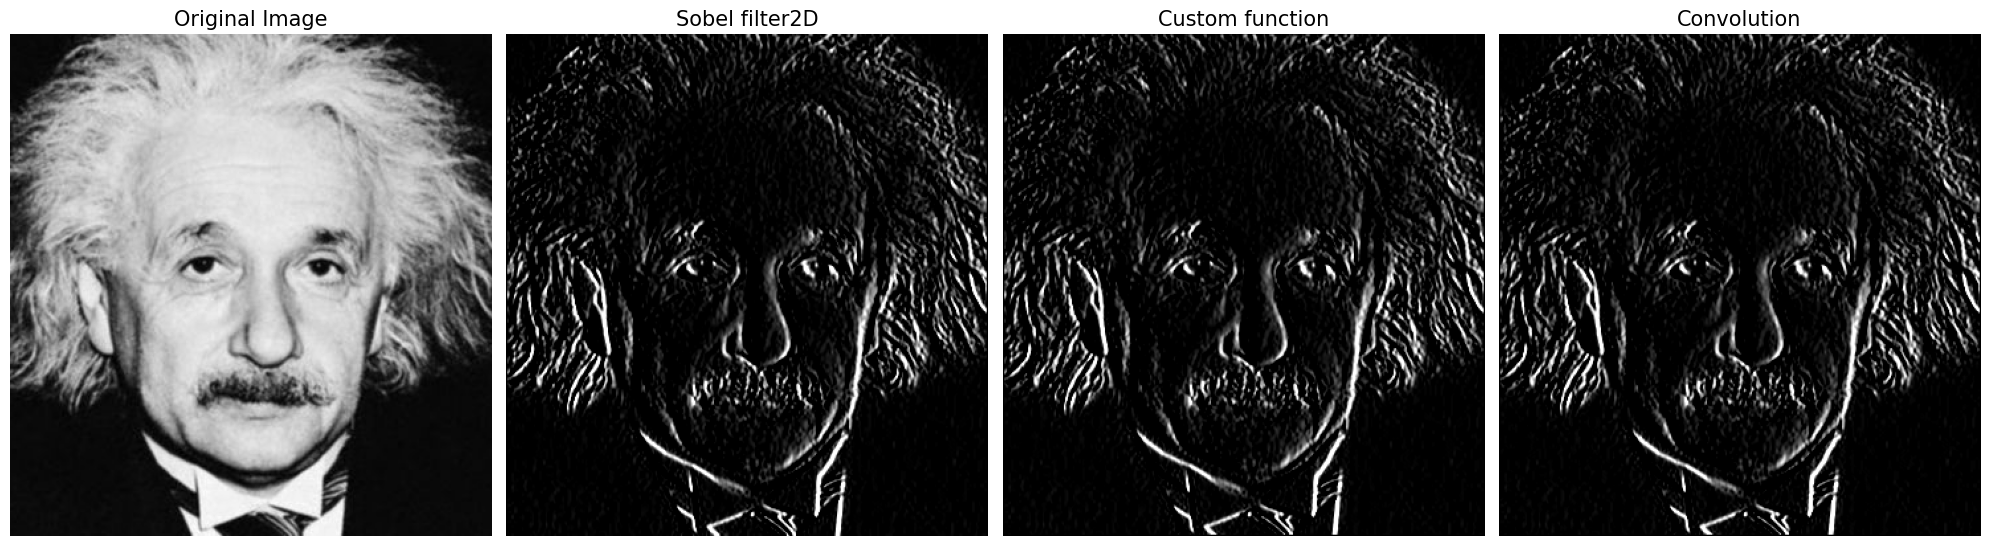

In [ ]:
def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape
    image_float = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)
    result = np.zeros(image.shape, 'float')
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image_float[m-k_hh: m+k_hh+1, n-k_hw: n+k_hw+1].flatten(), kernel.flatten())
    result = result * 255   # Scale back to 0-255
    result = np.minimum(255, np.maximum(0, result)).astype(np.uint8) # Clip values to 0-255
    return result

def apply_filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape
    result = np.zeros(image.shape, 'float')
    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            result[m, n] = np.dot(image[m-k_hh: m+k_hh+1, n-k_hw: n+k_hw+1].flatten(), kernel.flatten())
    return result

def apply_filters(image, kernels):
    image_float = cv.normalize(image.astype('float'), None, 0, 1, cv.NORM_MINMAX)
    for kernel in kernels:
        image_float = apply_filter(image_float, kernel)
    result = image_float * 255
    result = np.minimum(255, np.maximum(0, result)).astype(np.uint8) # Limit between 0 and 255
    return result

img7 = cv.imread( "einstein.png", cv.IMREAD_GRAYSCALE)

# Sobel vertical kernel
kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
img7_a = cv.filter2D(img7, -1, kernel)  # Using filter2D



img7_b = filter(img7, kernel)   # Using custom function
kernel1 = np.array([1, 2, 1]).reshape((3, 1))
kernel2 = np.array([1, 0, -1]).reshape((1, 3))
img7_c = apply_filters(img7, [kernel1, kernel2])

plt.figure(figsize = (20, 10))
plt.rc('axes', titlesize = 15)     # fontsize of the axes title
plt.subplot(141)
plt.imshow(img7, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(142)
plt.imshow(img7_a, cmap = 'gray')
plt.title('Sobel filter2D')
plt.axis('off')
plt.subplot(143)
plt.imshow(img7_b, cmap = 'gray')
plt.title('Custom function')
plt.axis('off')
plt.subplot(144)
plt.imshow(img7_c, cmap = 'gray')
plt.title('Convolution')
plt.axis('off')
plt.tight_layout()

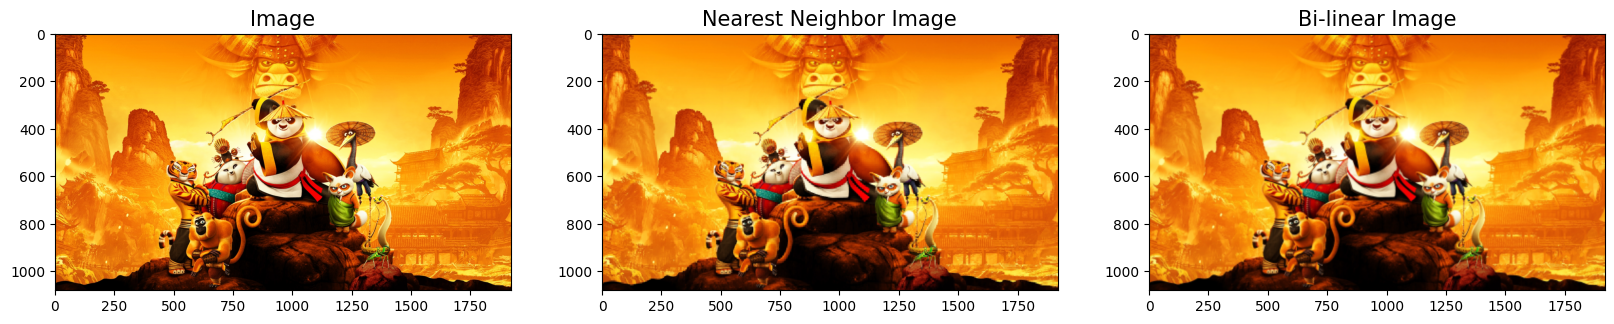

Text(0.5, 1.0, 'Bi-linear Image')

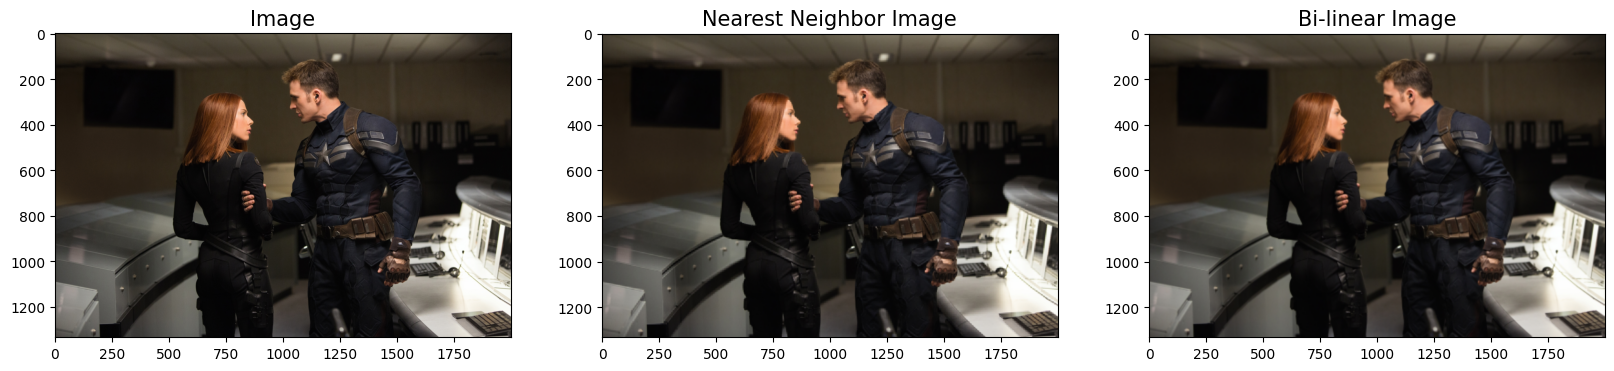

In [ ]:
def nn_zoom(image, scaling_factor):
    s = scaling_factor
    img = image

    row = img.shape[0] * s
    column = img.shape[1] * s
    zoomed_Img = np.zeros((row, column, 3), dtype = np.uint8)
    for i in range(row):
        for j in range(column):
                zoomed_Img[i, j] = img[round(i/s - 0.5), round(j/s - 0.5)]
                
    return zoomed_Img


def bl_zoom(Image, new_h, new_w):
    im = Image
    old_h, old_w, c = im.shape
    resized = np.zeros((new_h, new_w, c))
    
    if new_h !=0:
         w_scale_factor = (old_w) / (new_w)
    else:
        w_scale_factor = 0
        
    if new_w != 0:
         h_scale_factor = (old_h) / (new_h)
    else:
         h_scale_factor = 0
    
    for i in range(new_h):
        for j in range(new_w):
            x = i * h_scale_factor
            y = j * w_scale_factor
            
            x_floor = math.floor(x)
            x_ceil = min(old_h - 1, math.ceil(x))
            y_floor = math.floor(y)
            y_ceil = min(old_w - 1, math.ceil(y))
            if (x_ceil == x_floor) and (y_ceil == y_floor):
                q = im[int(x), int(y), :]
                
            elif (x_ceil == x_floor):
                a = im[int(x), int(y_floor), :]
                b = im[int(x), int(y_ceil), :]
                q = a * (y_ceil - y) + b * (y - y_floor)
                
            elif (y_ceil == y_floor):
                a = im[int(x_floor), int(y), :]
                b = im[int(x_ceil), int(y), :]
                q = (a * (x_ceil - x)) + (b * (x - x_floor))
                
            else:
                m = im[x_floor, y_floor, :]
                n = im[x_ceil, y_floor, :]
                p = im[x_floor, y_ceil, :]
                r = im[x_ceil, y_ceil, :]

                a = m * (x_ceil - x) + n * (x - x_floor)
                b = p * (x_ceil - x) + r * (x - x_floor)
                q = a * (y_ceil - y) + b * (y - y_floor) 
           
            resized[i,j,:] = q
            
    return resized.astype(np.uint8)



im = cv.imread('im06small.png')
im_large = cv.imread("im06.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)
im_znn = nn_zoom(im, 4)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im_large, cv.COLOR_BGR2RGB))
ax[0].set_title("Image")

ax[1].imshow(cv.cvtColor(im_znn, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest Neighbor Image")

ax[2].imshow(cv.cvtColor(im_zbl, cv.COLOR_BGR2RGB))
ax[2].set_title("Bi-linear Image")

plt.show()

im = cv.imread('im08small.png')
im_large = cv.imread("im08.png")
assert im is not None

old_h, old_w, c = im.shape
im_zbl = bl_zoom(im, 4*old_h, 4*old_w)
im_znn = nn_zoom(im, 4)

fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].imshow(cv.cvtColor(im_large, cv.COLOR_BGR2RGB))
ax[0].set_title("Image")

ax[1].imshow(cv.cvtColor(im_znn, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest Neighbor Image")

ax[2].imshow(cv.cvtColor(im_zbl, cv.COLOR_BGR2RGB))
ax[2].set_title("Bi-linear Image")

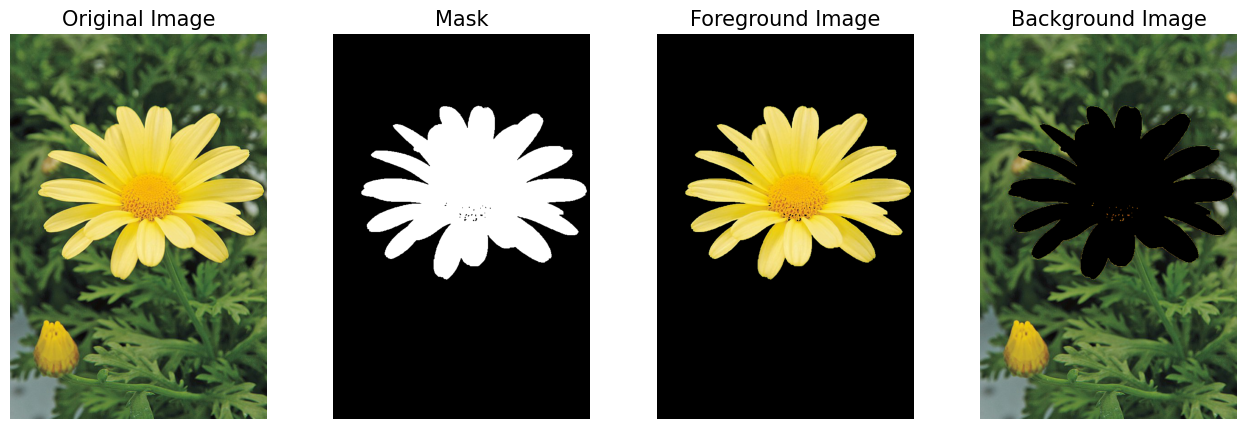

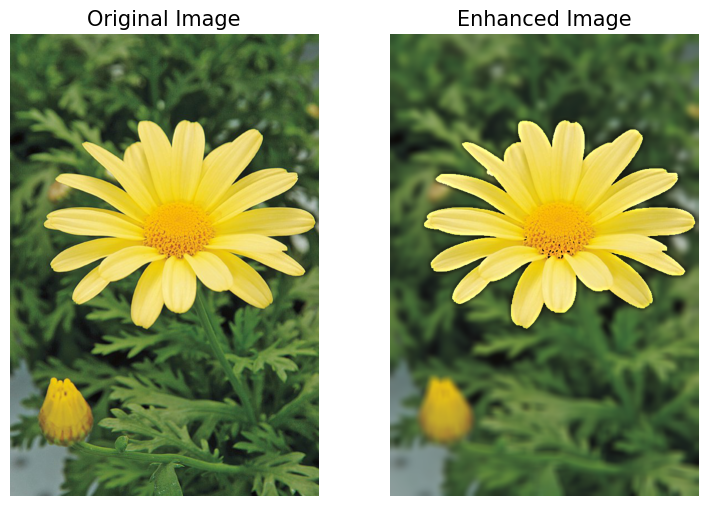

In [ ]:
im = cv.imread("flower.png", cv.IMREAD_COLOR)
im_original = im.copy()

mask = np.zeros(im.shape[:2], np.uint8)
rect = (0, 90, 560, 500)
fgdModel = np.zeros((1, 65), np.float64)
bgdModel = np.zeros((1, 65), np.float64)

cv.grabCut(im, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

mask1 = np.where((mask==0) | (mask==2), 0, 1).astype("uint8")
im_fgd = im*mask1[:, :, np.newaxis]
mask2 = np.where((mask==1) | (mask==3), 0, 1).astype("uint8")
im_bgd = im*mask2[:, :, np.newaxis]



fig, ax = plt.subplots(1, 4, figsize=(16, 5))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask1, cmap = "gray")
ax[1].set_title("Mask")
ax[1].axis("off")

ax[2].imshow(cv.cvtColor(im_fgd, cv.COLOR_BGR2RGB))
ax[2].set_title("Foreground Image")
ax[2].axis("off")

ax[3].imshow(cv.cvtColor(im_bgd, cv.COLOR_BGR2RGB))
ax[3].set_title("Background Image")
ax[3].axis("off")

plt.show()

im_blurred = cv.blur(im_bgd, (15, 15))
im_enhanced = cv.add(im_blurred, im_fgd)

fig, ax = plt.subplots(1, 2, figsize=(9, 6))

ax[0].imshow(cv.cvtColor(im_original, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(cv.cvtColor(im_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced Image")
ax[1].axis("off")

plt.show()